In [1]:
#medical image captioning neural network based on OpenAI’s CLIP architecture. 
#It encodes images and related captions into tensors, optimizing the last layer of transfer-learnable encoders to make
#image and text encodings similar.

!pip install scikit-learn


You should consider upgrading via the 'C:\Users\Admin\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


In [3]:
import os

print(os.listdir('.'))  
# This will list all files in the current directory


['.ipynb_checkpoints', 'medical_caption.ipynb', 'test', 'train', 'validation']


In [4]:
import pandas as pd
import os

#Paths to CSV files for train, validation, and test sets
train_path = r'C:\Users\Admin\OneDrive\Desktop\Final_Info_Sprig_Intern\train\traindata.csv'


val_path= r'C:\Users\Admin\OneDrive\Desktop\Final_Info_Sprig_Intern\validation\valdata.csv'


test_path= r'C:\Users\Admin\OneDrive\Desktop\Final_Info_Sprig_Intern\test\testdata.csv'


# List of all file paths
file_paths = [train_path, val_path, test_path]

# Check if all files exist and load them
datasets = {}
missing_files = []

for path in file_paths:
    if os.path.exists(path):
        print(f"File found: {path}")
        # Load the data into a DataFrame
        dataset_name = os.path.basename(path).split('.')[0]  # e.g., radiologytraindata
        datasets[dataset_name] = pd.read_csv(path)
        print(f"Data from {dataset_name} loaded successfully!")
    else:
        print(f"File not found: {path}")
        missing_files.append(path)

# If there are missing files, print them
if missing_files:
    print("Some files are missing. Please verify the following paths:")
    for file_path in missing_files:
        print(file_path)
else:
    # If all files are loaded, explore the data
    for dataset_name, data in datasets.items():
        print(f"\n{dataset_name} Data:")
        print(data.head())
        print(f"Shape of {dataset_name}: {data.shape}")


File found: C:\Users\Admin\OneDrive\Desktop\Final_Info_Sprig_Intern\train\traindata.csv
Data from traindata loaded successfully!
File found: C:\Users\Admin\OneDrive\Desktop\Final_Info_Sprig_Intern\validation\valdata.csv
Data from valdata loaded successfully!
File found: C:\Users\Admin\OneDrive\Desktop\Final_Info_Sprig_Intern\test\testdata.csv
Data from testdata loaded successfully!

traindata Data:
           id                                    name  \
0  ROCO_00002          PMC4083729_AMHSR-4-14-g002.jpg   
1  ROCO_00003       PMC2837471_IJD2009-150251.001.jpg   
2  ROCO_00004  PMC2505281_11999_2007_30_Fig6_HTML.jpg   
3  ROCO_00005       PMC3745845_IJD2013-683423.005.jpg   
4  ROCO_00007   PMC4917066_amjcaserep-17-301-g001.jpg   

                                             caption  
0   Computed tomography scan in axial view showin...  
1   Bacterial contamination occurred after comple...  
2   The patient had residual paralysis of the han...  
3    Panoramic radiograph after imm

In [5]:
#loading the data

In [6]:
# File paths
import pandas as pd

train_path = r'C:\Users\Admin\OneDrive\Desktop\Final_Info_Sprig_Intern\train\traindata.csv'


train_data = pd.read_csv(train_path)
# Add this line after loading and preprocessing the data
print(train_data.shape)
# Print specific columns

print(train_data.columns)
#display of data
print(train_data)




(65450, 3)
Index(['id', 'name', 'caption'], dtype='object')
               id                                           name  \
0      ROCO_00002                 PMC4083729_AMHSR-4-14-g002.jpg   
1      ROCO_00003              PMC2837471_IJD2009-150251.001.jpg   
2      ROCO_00004         PMC2505281_11999_2007_30_Fig6_HTML.jpg   
3      ROCO_00005              PMC3745845_IJD2013-683423.005.jpg   
4      ROCO_00007          PMC4917066_amjcaserep-17-301-g001.jpg   
...           ...                                            ...   
65445  ROCO_81819  PMC3517833_CRIM.HEMATOLOGY2012-490438.001.jpg   
65446  ROCO_81820               PMC5487234_rb-50-03-0190-g13.jpg   
65447  ROCO_81821                 PMC2974222_kjr-11-612-g001.jpg   
65448  ROCO_81822                 PMC3532764_AJNS-7-151-g002.jpg   
65449  ROCO_81823               PMC3509000_pone.0050319.g002.jpg   

                                                 caption  
0       Computed tomography scan in axial view showin...  
1    

In [7]:
#text Preprocessing:-This part remains the same. It processes the text data by converting to lowercase, removing links,
#new lines, words with numbers, extra spaces, special characters, stop words, and applying stemming and lemmatization

In [8]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Ensure stopwords and wordnet are downloaded
nltk.download('stopwords')
nltk.download('wordnet')

# Load the stopwords list
stop_words = set(stopwords.words('english'))

# Define preprocessing function
def preprocess_text(text):
    # 1. Lower Case
    text = text.lower()
    
    # 2. Remove Links
    text = re.sub(r'http\S+|www\S+', '', text)
    
    # 3. Remove New Lines (\n)
    text = text.replace('\n', ' ')
    
    # 4. Remove Words Containing Numbers
    text = re.sub(r'\w*\d\w*', '', text)
    
    # 5. Remove Extra Spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # 6. Remove Special Characters
    text = re.sub(r'[^\w\s]', '', text)
    
    # 7. Remove Stop Words
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    # 8. Stemming
    ps = PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    
    # 9. Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    
    return text

# File paths
train_path = r'C:\Users\Admin\OneDrive\Desktop\Final_Info_Sprig_Intern\train\traindata.csv'

# Load the data
train_data = pd.read_csv(train_path)

# Apply preprocessing to the caption column and store it in a new column
train_data['cleaned_caption'] = train_data['caption'].apply(preprocess_text)

# Check the result
print(train_data[['caption', 'cleaned_caption']].head())

# Display the shape of the data
print(train_data.shape)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                             caption  \
0   Computed tomography scan in axial view showin...   
1   Bacterial contamination occurred after comple...   
2   The patient had residual paralysis of the han...   
3    Panoramic radiograph after immediate loading.\n   
4   Plain abdomen x-ray: Multiple air levels at t...   

                                     cleaned_caption  
0  comput tomographi scan axial view show obliter...  
1  bacteri contamin occur complet root canal trea...  
2  patient residu paralysi hand poliomyel necessa...  
3                     panoram radiograph immedi load  
4  plain abdomen xray multipl air level midabdome...  
(65450, 4)


In [11]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [14]:
!pip install opencv-python

     ---------------------------------------- 38.8/38.8 MB 9.9 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\Admin\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [15]:
import pandas as pd
import os
import cv2
from tqdm import tqdm

# Define paths to CSV files for train, validation, and test sets
train_path = r'C:\Users\Admin\OneDrive\Desktop\Final_Info_Sprig_Intern\train\traindata.csv'

# Load the data
train_data = pd.read_csv(train_path)

# Directory containing the images
image_dir = r'C:\Users\Admin\OneDrive\Desktop\Final_Info_Sprig_Intern\test\radiology\images'

# Initialize a list to hold missing images
missing_images = []

# Identify missing images
for img_name in tqdm(train_data['name'], desc="Checking images"):
    img_path = os.path.join(image_dir, img_name)
    if not os.path.exists(img_path):
        missing_images.append(img_name)

# Print number of missing images
print(f"Number of missing images: {len(missing_images)}")

# Remove rows with missing images from the DataFrame
train_data_cleaned = train_data[~train_data['name'].isin(missing_images)]

# Save the cleaned data to a new CSV file
cleaned_csv_path = r'C:\Users\Admin\OneDrive\Desktop\Final_Info_Sprig_Intern\train\radiologytraindata_cleaned.csv'
train_data_cleaned.to_csv(cleaned_csv_path, index=False)

print(f"Cleaned data saved to {cleaned_csv_path}")


Checking images: 100%|████████████████████████████████████████████████████████| 65450/65450 [00:03<00:00, 17275.67it/s]


Number of missing images: 65450
Cleaned data saved to C:\Users\Admin\OneDrive\Desktop\Final_Info_Sprig_Intern\train\radiologytraindata_cleaned.csv


In [16]:
# image preprocessing 
# samples and batches are created due to overload of images and 
# jupyter notebook is crashed 

Processing images: 100%|███████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 77.97it/s]


Number of missing images: 0
(1000, 5)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.004312822..1.0048952].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0143263275..0.8167424].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.010879786..0.9630389].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.00072799384..1.0004776].


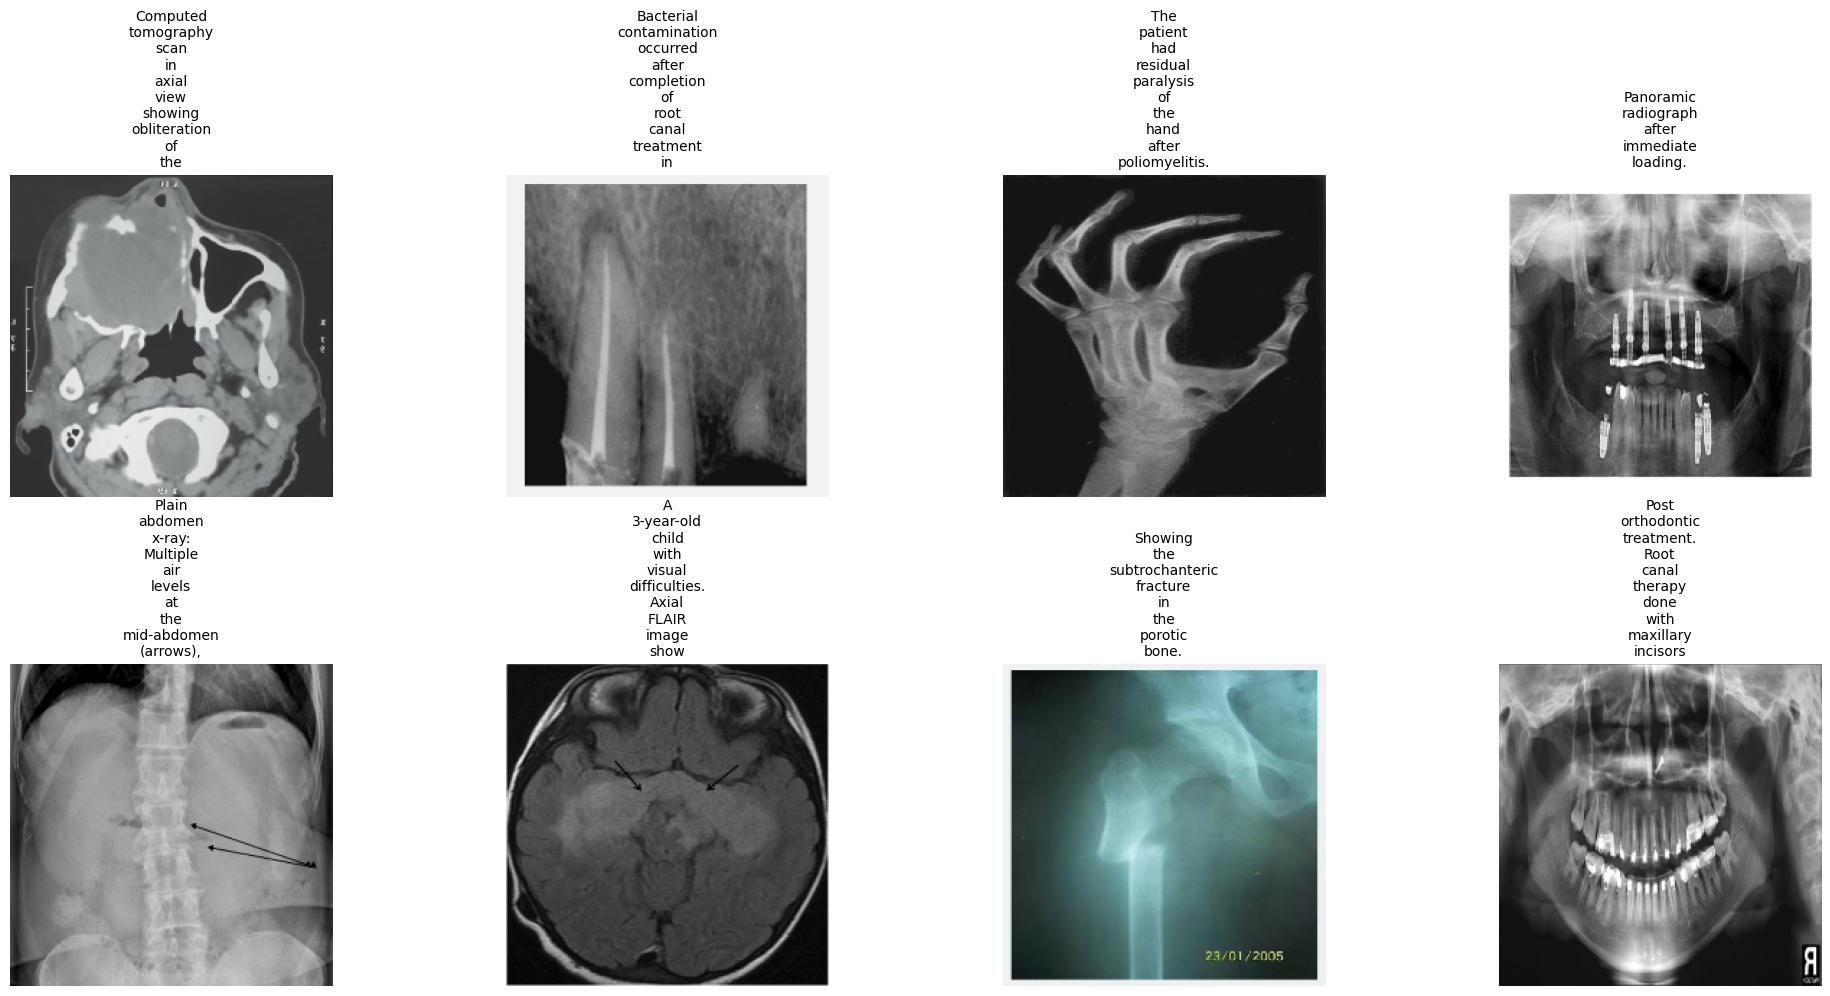

In [19]:
import pandas as pd
import os
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt

# Define image loading function using TensorFlow
def load_image(image_path):
    image = tf.io.read_file(image_path)  # Read image file
    image = tf.image.decode_jpeg(image, channels=3)  # Decode JPEG image
    return image

# Define image preprocessing function using TensorFlow
def preprocess_image(image, target_size=(224, 224)):
    image = tf.image.resize(image, target_size)  # Resize the image
    image = tf.image.random_flip_left_right(image)  # Random flip
    image = tf.image.random_brightness(image, max_delta=0.1)  # Random brightness
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1)  # Random contrast
    image = image / 255.0  # Normalize pixel values
    return image

# File path for training data
train_path = r'C:\Users\Admin\OneDrive\Desktop\Final_Info_Sprig_Intern\train\traindata.csv'

# Load the preprocessed text data
train_data = pd.read_csv(train_path)

# Ensure 'cleaned_caption' column exists, if not, use 'caption' column
if 'cleaned_caption' not in train_data.columns:
    train_data['cleaned_caption'] = train_data['caption']

# Limit to the first 1000 images
train_data = train_data.head(1000)

# Directory containing the images
image_dir = r'C:\Users\Admin\OneDrive\Desktop\Final_Info_Sprig_Intern\train\radiology\images'

# Load images and check for missing ones
image_data = []
missing_images = []

# Process images
for img_name in tqdm(train_data['name'], desc="Processing images"):
    img_path = os.path.join(image_dir, img_name)
    try:
        img = load_image(img_path)
        img = preprocess_image(img)
        image_data.append(img.numpy())  # Convert Tensor to NumPy array
    except Exception as e:
        print(f"Error loading image {img_name}: {e}")
        missing_images.append(img_name)

# Report missing images
print(f"Number of missing images: {len(missing_images)}")
if missing_images:
    print("Missing images:")
    for img_name in missing_images[:10]:  # Print only first 10 missing images for brevity
        print(img_name)

# Filter out rows with missing images
train_data = train_data[~train_data['name'].isin(missing_images)]

# Add the processed images to the DataFrame
train_data = train_data.iloc[:len(image_data)]
train_data['image'] = image_data

# Display the shape of the data
print(train_data.shape)

# Display the first 8 images and their cleaned captions
if not train_data.empty:
    fig, axs = plt.subplots(2, 4, figsize=(20, 10))
    for i, ax in enumerate(axs.flatten()):
        if i < len(train_data):
            example_row = train_data.iloc[i]
            ax.imshow(example_row['image'])
            caption = example_row['cleaned_caption']
            ax.set_title("\n".join(caption.split()[:10]), fontsize=10)
            ax.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("No images were loaded successfully.")
